# importing libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, accuracy_score
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from catboost import Pool, cv
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings("ignore")

# reading data

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Understanding data

In [3]:
# shape of data
df.shape

(10000, 14)

In [4]:
# Check for null values in the dataset
null_values = df.isnull().sum()
print("Null Values:")
print(null_values)

# Check for NaN values in the dataset
nan_values = df.isna().sum()
print("\nNaN Values:")
print(nan_values)

# Check for duplicated rows in the dataset
duplicated_rows = df.duplicated().sum()
print(f"\nNumber of Duplicated Rows: {duplicated_rows}")

# Display the rows with duplicated values
duplicated_df = df[df.duplicated()]
print("\nDuplicated Rows:")
print(duplicated_df)

Null Values:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

NaN Values:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Number of Duplicated Rows: 0

Duplicated Rows:
Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []


In [5]:
# Summary statistics of numerical features
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
# Information about the dataset, including data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df['Exited'].value_counts().to_frame()

,Exited
0,7963
1,2037


# exploratory data analysis

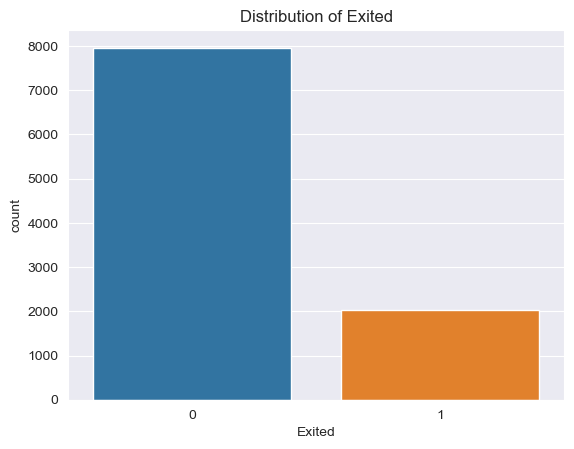

In [8]:
# Visualize the distribution of the target variable (Exited)
sns.countplot(x='Exited', data=df)
plt.title('Distribution of Exited')
plt.show()

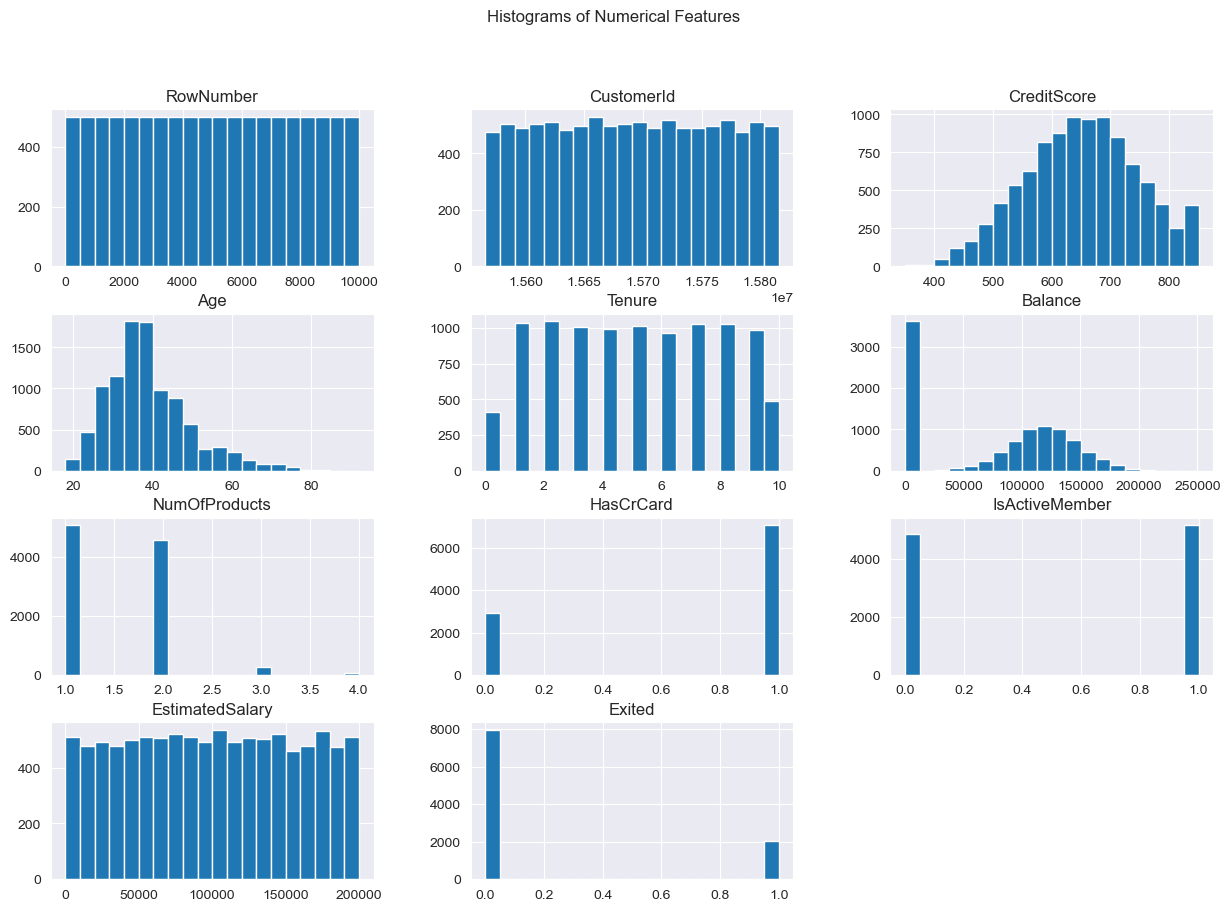

In [9]:
# Visualize the distribution of numerical features
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

In [10]:
# Pairwise relationship between numerical features
sns.pairplot(df, hue='Exited', diag_kind='kde')
plt.suptitle('Pairwise Relationship between Numerical Features')
plt.show()

KeyboardInterrupt: 

In [ ]:
# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Boxplot to visualize the distribution of numerical features by the target variable
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
sns.boxplot(x='Exited', y='Age', data=df, ax=axes[0, 0])
sns.boxplot(x='Exited', y='Balance', data=df, ax=axes[0, 1])
sns.boxplot(x='Exited', y='CreditScore', data=df, ax=axes[1, 0])
sns.boxplot(x='Exited', y='EstimatedSalary', data=df, ax=axes[1, 1])
plt.suptitle('Boxplots of Numerical Features by Exited')
plt.show()

In [ ]:
# Explore the distribution of categorical features (Geography, Gender, HasCrCard, IsActiveMember)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
sns.countplot(x='Geography', hue='Exited', data=df, ax=axes[0, 0])
sns.countplot(x='Gender', hue='Exited', data=df, ax=axes[0, 1])
sns.countplot(x='HasCrCard', hue='Exited', data=df, ax=axes[1, 0])
sns.countplot(x='IsActiveMember', hue='Exited', data=df, ax=axes[1, 1])
plt.suptitle('Distribution of Categorical Features by Churn')
plt.show()

In [ ]:
# Explore the relationship between numerical features and customer churn using pair plots
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
sns.pairplot(df, hue='Exited', vars=numerical_features, diag_kind='kde')
plt.suptitle('Pairwise Relationship between Numerical Features by Churn')
plt.show()

# Feature engineering

In [ ]:
df.head()

In [ ]:
data = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1).copy()
data.head()

# One hot encoding

The categorical features `geography` and` gender` must be converted to numerical ones using the direct coding technique, or display (English One-Hot Encoding, OHE). We need quantitative features to be more accurate

In [ ]:
data['Geography'].value_counts()

In [ ]:
data['Gender'].value_counts()

In [ ]:
# OHE of features
gender_ohe = pd.get_dummies(df["Gender"])
country_ohe = pd.get_dummies(df["Geography"])

# delete catfeatures
data.drop(["Gender", "Geography"], axis=1, inplace=True)

#concat new sets
df_ohe = pd.concat([data, gender_ohe, country_ohe], axis=1)

df_ohe.head()

In [ ]:
df_ohe.info()

# Scaling

In [ ]:
numeric = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(df_ohe[numeric])
pd.options.mode.chained_assignment = None
df_ohe[numeric] = scaler.transform(df_ohe[numeric])
df_ohe.head()

Columns were coded. 

It is also necessary to standardize the characteristics, since the quantitative values ​​vary greatly. We will not apply standardization to the columns `tenure`,` num_of_products`, `has_crcard`,` isactive_member` and to the target with transformed categorical

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
# Separate features and target variable
X = df_ohe.drop('Exited', axis=1)
y = df_ohe['Exited']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Apply SMOTE to upsample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Classification algorithms
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [ ]:
# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train_resampled, y_train_resampled)

    # Predictions
    y_pred = clf.predict(X_test)

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    # Display results
    print(f"\nClassifier: {clf_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{confusion}")

These metrics give you an overall view of how well each classifier is performing. Here's a brief explanation of each metric:

<p>Accuracy: Overall correctness of the classifier.
<p>Precision: Proportion of true positive predictions among all positive predictions. It tells you how many of the predicted positive instances are actually positive.
<p>Recall (Sensitivity): Proportion of true positive predictions among all actual positive instances. It tells you how many of the actual positive instances are correctly predicted.
<p>F1 Score: The harmonic mean of precision and recall. It provides a balance between precision and recall.
<p>The choice of the best classifier depends on the specific goals and requirements of your application. For instance, if precision is crucial (minimizing false positives), Random Forest might be a better choice. If recall is more important (minimizing false negatives), SVM seems to perform better in this case.

# Hyperparameter tuning

In [ ]:
# Define parameter grids for hyperparameter tuning
param_grids = {
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['auto', 'sqrt']},
    'SVM': {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale', 'auto'], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2, 3, 4, 5]}
}

In [ ]:
# Perform hyperparameter tuning and evaluate metrics
for clf_name, clf in classifiers.items():
    print(f"\nClassifier: {clf_name}")

    # Hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(clf, param_grids[clf_name], scoring='roc_auc', cv=3)
    grid_search.fit(X_train_resampled, y_train_resampled)

    # Best hyperparameters
    best_params = grid_search.best_params_
    print(f"Best Hyperparameters: {best_params}")

    # Predictions
    y_pred = grid_search.predict(X_test)

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])

    # Display results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"Confusion Matrix:\n{confusion}")

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, grid_search.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {clf_name}')
    plt.legend(loc='lower right')
    plt.show()